# Data Analysis

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
origin_data = pd.read_csv("data_set.csv")
data = origin_data.copy()
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [38]:
data.rename(columns = {'label':'Plant', "N" : "Nitrogen", "P": "Phosphorus", "K": "Potassium"}, inplace = True)

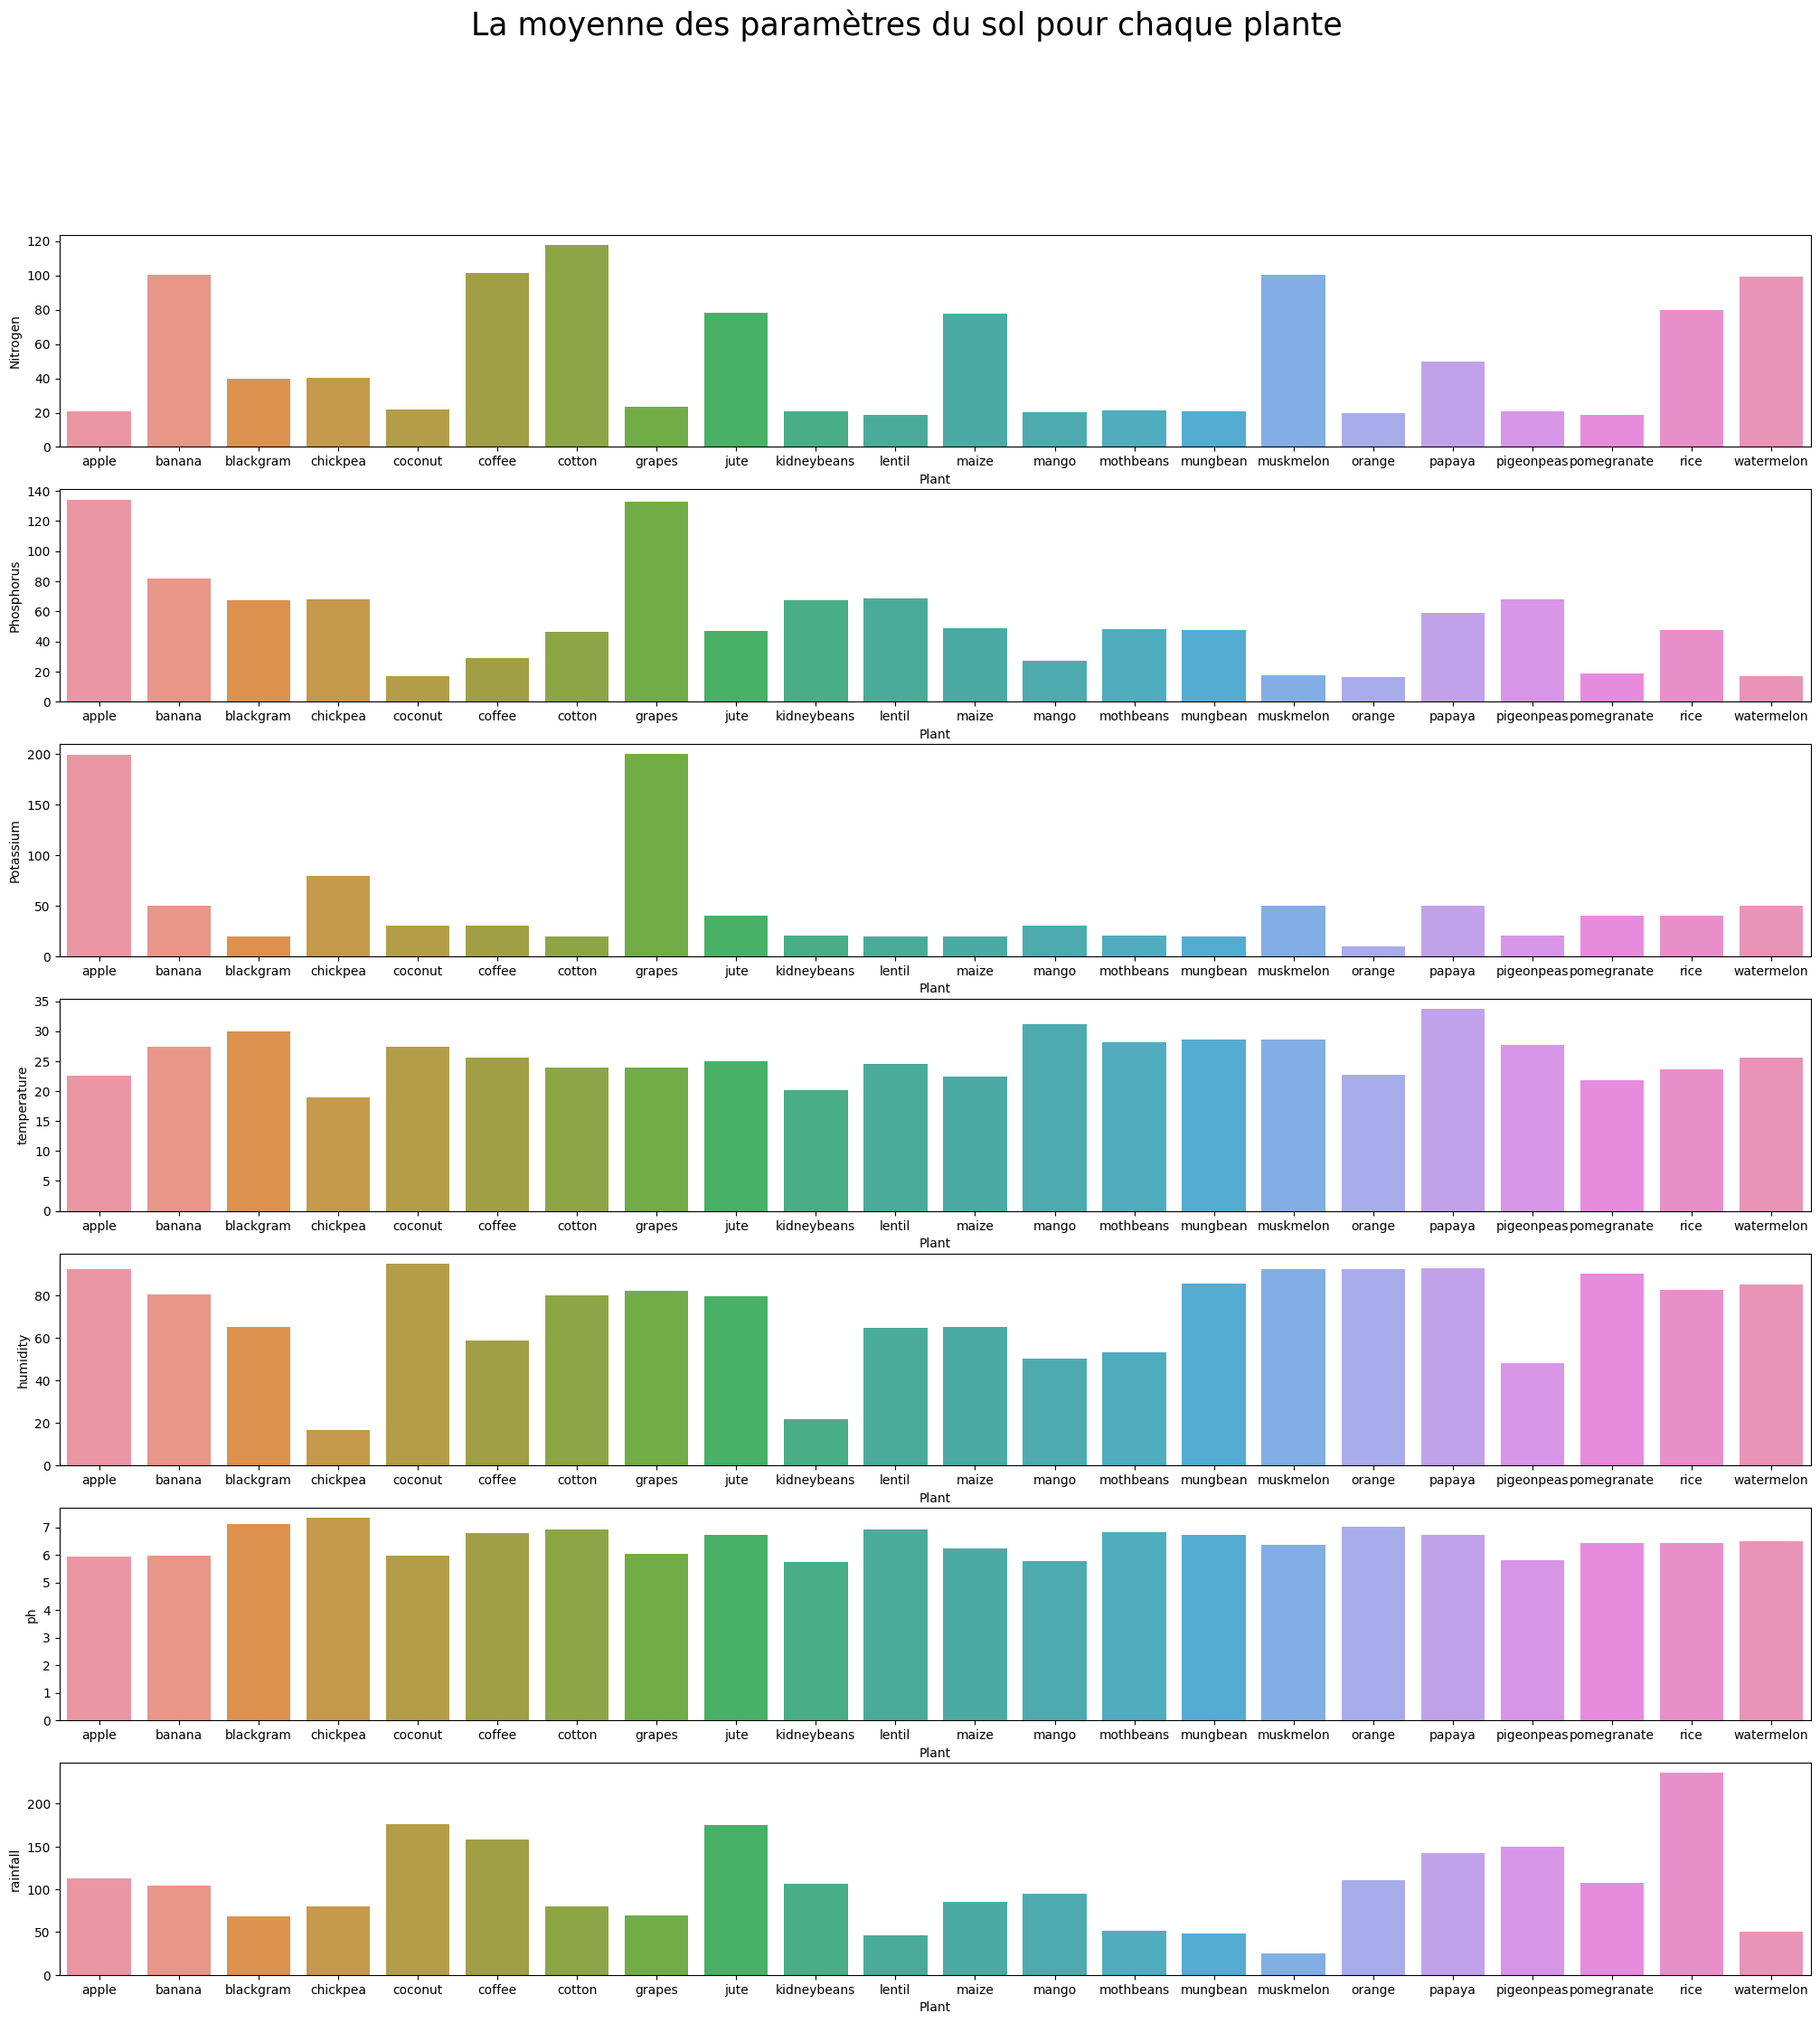

In [103]:
fig,ax=plt.subplots(7,1,figsize=(25,25))

grouped_data = data.groupby(by="Plant").mean().reset_index()

for index,i in enumerate(grouped_data.columns[1:]):
    sns.barplot(data=grouped_data,x='Plant',y=i,ax=ax[index])
    plt.suptitle("La moyenne des paramètres du sol pour chaque plante",size=25)


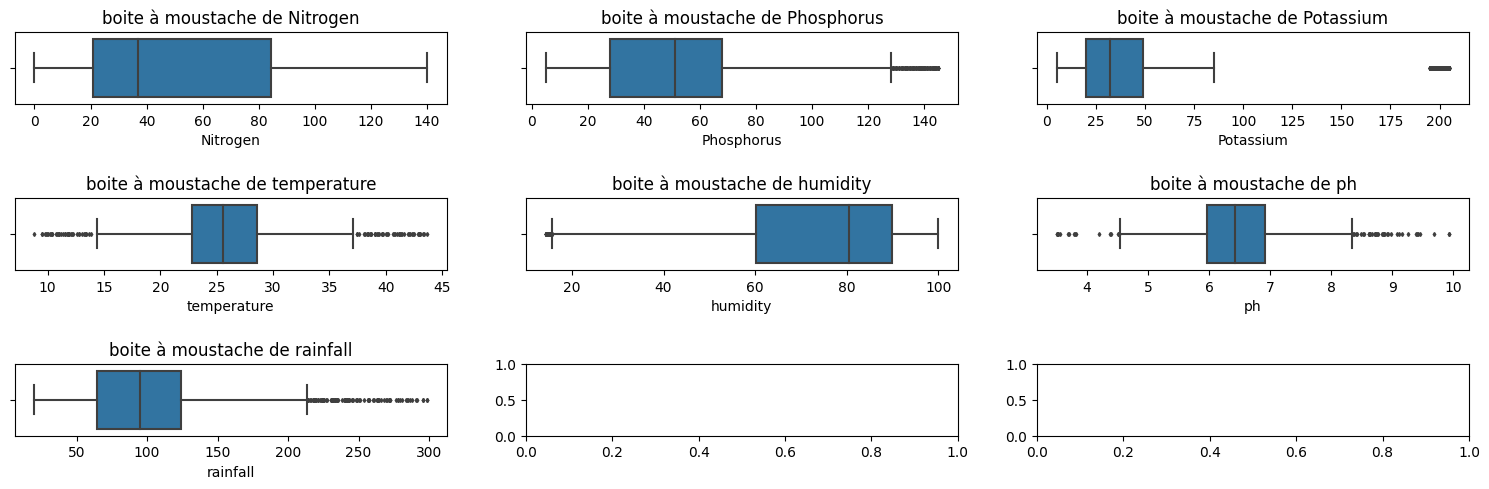

In [102]:
fig,axes=plt.subplots(3,3,figsize=(15,5))

parameters = data.drop(columns=["Plant"])
i = 0; 

for indexR in range(3) : 
    for indexC in range(3):
            sns.boxplot(ax=axes[indexR, indexC], data=data, x=parameters.columns[i], flierprops={'markersize': 2})
            axes[indexR, indexC].set_title("Boite à moustache de " + data.columns[i])
            i+=1
            if (i>6) : break

fig.tight_layout(h_pad=2, w_pad=2)
    
    

C:\Users\Somaya\AppData\Local\Temp\ipykernel_7404\2328080454.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


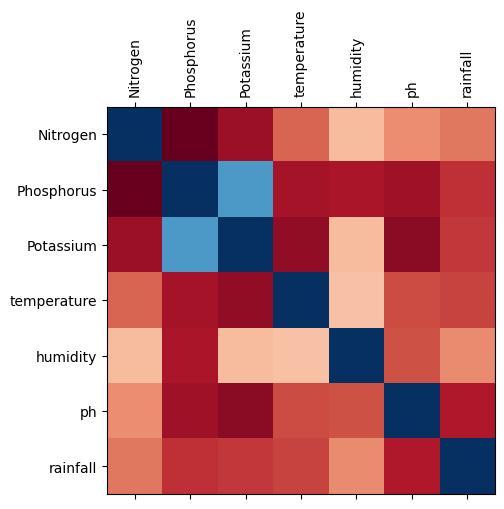

In [112]:
corr = data.corr()
plt.matshow(corr,cmap='RdBu')
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)),corr.columns);

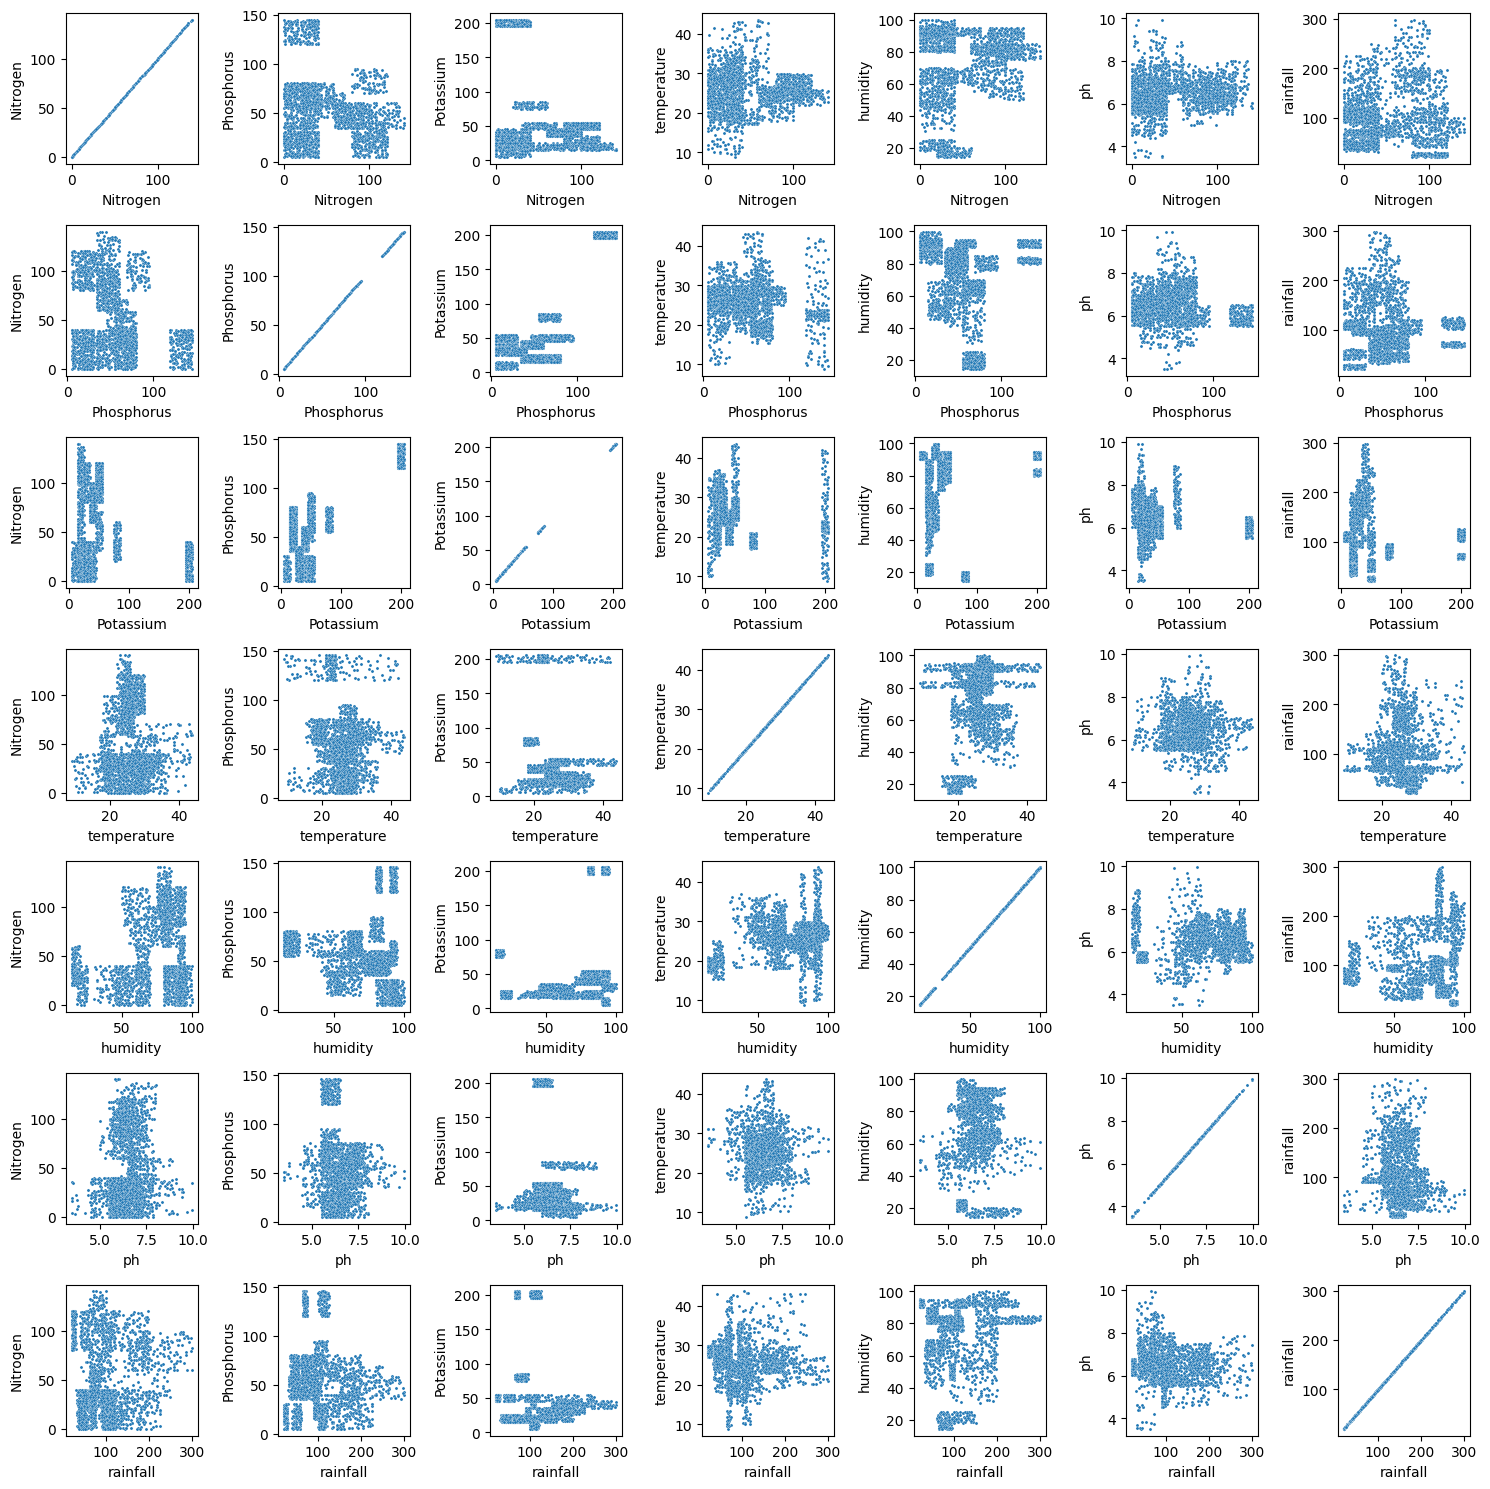

In [123]:
fig,axes=plt.subplots(7,7,figsize=(15,15))

for indexR in range (7) : 
    for indexC in range (7) : 
        sns.scatterplot(ax=axes[indexR, indexC], data=data, x=data.columns[indexR], y=data.columns[indexC], s=5)

fig.tight_layout(h_pad=1, w_pad=1)
